 ## Business Understanding
 Based on the available data seeing below, we asked ourselves the following questions:
    1. The dependency between price and season
    2. How well can we predict prices and what are the big contributing factors
    3. The dependency between review comment's sentiment and season 

For answering these questions, we will use data from calendar, reviews and listings databases.

This notebook focuses on the second question. 
To answer this question, we'll first create a df with potential explanatory variables for the response variabe 'price', clean the data and fit an OLS model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
#create df for calendar.csv
df1 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\calendar.csv')
df1.head(3)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [2]:
#create df for listings.csv
pd.set_option('display.max_columns', None)
df2 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\listings.csv')
df2.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
#create DF with explanatory variables
df=df2[['host_response_rate', 'host_response_time','host_is_superhost', 'host_listings_count', 'host_has_profile_pic','host_neighbourhood',
       'neighbourhood','zipcode','is_location_exact','property_type','room_type','accommodates',
       'bathrooms','bedrooms','beds','bed_type','price', 'number_of_reviews', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification', 'reviews_per_month', 'review_scores_rating']]



## Data Preparation

Converting the data types into suitable types. Since price and host_response_rate cannot be str type we add a column of price and host_response_rate in float type. 
We then drop the old 'price' and 'host_response_rate' column.

In [4]:
#clean data
#get column for price as float, drop old column

def float_price(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    float - float, denoting the price extracted from row
    '''
    str= row['price'][1:]
    str=str.replace(',', '')
    return float(str)
df['float_price']=df.apply(lambda row: float_price(row), axis=1)
df = df.drop(['price'],axis=1)



C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [5]:
#get column for host_response_rate as float, drop old column

def float_host_response_rate(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    float - float, denoting the host_response_rate extracted from row
    '''
    stri= str(row['host_response_rate'])
    stri=stri.replace('%', '')
    return float(stri)
df['float_host_response_rate']=df.apply(lambda row: float_host_response_rate(row), axis=1)
df = df.drop(['host_response_rate'],axis=1)


In [6]:
#check for missing data, impute with mode if more than 10% of rows missing, otherwise drop rows
fill_mode = lambda col: col.fillna(col.mode()[0])

try:
    df.apply(fill_mode, axis=0)
except:
    print('That broke...')
    
#impute with mode if more than 10% of rows missing, because host_response_time, neighbourhood, reviews_per_month, 
#review_scores_rating have too many missing values
float_host_response_rate
missing_vals=[]
for i in df.columns:
    if df[i].isnull().mean()>0.1:
        print(i)
        df[i]=df[i].fillna(df[i].mode()[0])
    missing_vals.append(df[i].isnull().mean())
        
#print remaining columns with less than 10% missing values        
missing_vals.sort(reverse=True)
print(missing_vals)

#drop missing rows, because less than 10% of values per column are missing in df
shape_bef=df.shape[0]
print(df.shape[0])
df=df.dropna()
print(df.shape[0])
shape_aft=df.shape[0]
print('dropped ', shape_bef-shape_aft, ' rows')

host_response_time
neighbourhood
reviews_per_month
review_scores_rating
float_host_response_rate
[0.0785751702462022, 0.0041906757464641176, 0.0018334206390780514, 0.001571503404924044, 0.0005238344683080147, 0.0005238344683080147, 0.0005238344683080147, 0.00026191723415400735, 0.00026191723415400735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3818
3490
dropped  328  rows


In [7]:
#get dummy variables and drop non-numeric variables from df
dummy_vars = pd.get_dummies(df[df.select_dtypes(include=['object']).columns])
df=df.drop(df[df.select_dtypes(include=['object']).columns], axis=1)
df=pd.merge(df,dummy_vars, left_index=True, right_index=True)

## Data Modeling
Split data into train and test data sets and fit OLS model

In [8]:

#Split intro train and test data
X = df.drop(['float_price'],axis=1)
y = df['float_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=7)

In [9]:
# fit OLS model
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:            float_price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     18.66
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:31   Log-Likelihood:                -12489.
No. Observations:                2338   AIC:                         2.541e+04
Df Residuals:                    2123   BIC:                         2.665e+04
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [10]:
# get test ME and R^2
ypred = olsres.predict(X_test) # out of sample prediction
ols = sqrt(mean_squared_error(y_test,ypred)) #Mean error
rsquared = y_test.corr(ypred)**2 #R^2

print('ME: ', ols, '\nR^2: ', rsquared)

ME:  69.10674329861479 
R^2:  0.5272282134865829


In [11]:
#sort ols parameters
list1 = sorted(olsres.params)
print(list1)

[-319.45867408290485, -142.9914985565129, -106.22152459457851, -100.48347246753471, -89.48266492997205, -81.99393023488703, -81.07852956459554, -72.3264204147373, -66.95552176203064, -65.914143442324, -63.45960142304688, -63.191073937626115, -61.907911826635484, -60.894289750503724, -58.838946545694874, -57.81539707514122, -56.46786378581052, -56.07325638065312, -54.96393348364633, -51.86695483446793, -51.33126065741913, -50.62974480444997, -48.19635286602403, -46.56183081599376, -46.303805419584556, -45.76422632756416, -40.05920340636899, -37.855474836885406, -36.467249916392575, -35.883233005954835, -32.94897900797618, -32.948979007976014, -32.653916478262765, -32.15094560018202, -32.15094560018195, -31.965636031112208, -31.957505924936658, -29.134177393404894, -28.15807502093245, -26.24774839723819, -26.207074983360727, -26.20707498336062, -25.76004989219285, -25.63164389862261, -25.044352274586295, -25.04435227458555, -24.350310791629873, -22.229038587100344, -22.229038587099158, -

## Evaluation
Property_types like 'boat', 'dorm' or treehouse got very high absolute coefficients, hence they have a high influence on the price. Host_neighbourhoods like 'North_Hollywood', 'Kaanapali' and neighbourhoods like 'Madrona' also had high influence on the price. 
The OLS got test ME and R^2 of 

ME:  69.10674329861479 

R^2:  0.5272282134865829

In [12]:
#check OLS parameters with highest values
df2[df2['property_type']=='Boat']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
212,781474,https://www.airbnb.com/rooms/781474,20160104002432,2016-01-04,Studio at Mibbett Hollow -Private,NaN,The “Studio at Mibbett Hollow' is in a Beautif...,The “Studio at Mibbett Hollow' is in a Beautif...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/10950450/6...,https://a2.muscache.com/im/pictures/10950450/6...,https://a2.muscache.com/ac/pictures/10950450/6...,https://a2.muscache.com/ac/pictures/10950450/6...,4122018,https://www.airbnb.com/users/show/4122018,Lynne,2012-11-11,"Seattle, Washington, United States",I am a Marine Survey and Investigator inspecti...,within an hour,100%,NaN,f,https://a1.muscache.com/ac/users/4122018/profi...,https://a1.muscache.com/ac/users/4122018/profi...,Queen Anne,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Westlake Ave N, Seattle, WA 98109, United States",Queen Anne,East Queen Anne,Queen Anne,Seattle,WA,98109,Seattle,"Seattle, WA",US,United States,47.642912,-122.344683,t,Boat,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",300.0,$85.00,$560.00,"$2,195.00",NaN,$15.00,1,$0.00,2,180,3 months ago,t,30,60,89,89,2016-01-04,1,2013-04-03,2013-04-03,90.0,NaN,10.0,10.0,10.0,8.0,10.0,f,NaN,WASHINGTON,f,moderate,t,t,2,0.03
319,3066740,https://www.airbnb.com/rooms/3066740,20160104002432,2016-01-04,The Silhouette - Lake Union Seattle,Enjoy your stay in Seattle by staying on Lake ...,The Silhouette is a 63ft power yacht. Kitchen ...,Enjoy your stay in Seattle by staying on Lake ...,none,Located on Lake Union 2 minutes from Gas Works...,Now Available for Booking Christmas Ships crui...,Bus transit available. Taxi service. Uber. Kay...,https://a2.muscache.com/ac/pictures/73026054/f...,https://a2.muscache.com/im/pictures/73026054/f...,https://a2.muscache.com/ac/pictures/73026054/f...,https://a2.muscache.com/ac/pictures/73026054/f...,15606907,https://www.airbnb.com/users/show/15606907,"Karen, Chip & Karl",2014-05-16,"Seattle, Washington, United States",We are a boating family and live in the beauti...,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/15606907/prof...,https://a2.muscache.com/ac/users/15606907/prof...,NaN,1.0,1.0,"['email', 'phone', 'linkedin', 'reviews', 'man...",t,t,"N Northlake Way, Seattle, WA 98103, United States",NaN,Wallingford,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.648572,-122.340759,f,Boat,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",""Air Conditioning"",Kitchen,""Fre...",NaN,$680.00,NaN,NaN,"$1,000.00",$275.00,6,$0.00,1,1125,6 weeks ago,t,0,26,56,331,2016-01-04,6,2015-06-17,2015-08-10,100.0,10.0,10.0,

In [13]:

df2[df2['host_neighbourhood']=='North Hollywood']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1744,4379551,https://www.airbnb.com/rooms/4379551,20160104002432,2016-01-04,Cute 2 bedroom house on Alki Beach,Cute and Comfortable house 15 minutes to downt...,Welcome to our home! A peaceful cute space on...,Cute and Comfortable house 15 minutes to downt...,none,What is not to love about Alki Beach?! Beauti...,NaN,Bus system is easy to use and the water taxi t...,https://a2.muscache.com/ac/pictures/55012169/b...,https://a2.muscache.com/im/pictures/55012169/b...,https://a2.muscache.com/ac/pictures/55012169/b...,https://a2.muscache.com/ac/pictures/55012169/b...,19137950,https://www.airbnb.com/users/show/19137950,Margaux,2014-07-29,"Los Angeles, California, United States",NaN,within a few hours,100%,100%,f,https://a2.muscache.com/ac/pictures/de8096ff-9...,https://a2.muscache.com/ac/pictures/de8096ff-9...,North Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'linkedin', 'ju...",t,t,"62nd Avenue Southwest, Seattle, WA 98116, Unit...",Alki,Alki,West Seattle,Seattle,WA,98116,Seattle,"Seattle, WA",US,United States,47.576517,-122.411086,t,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$100.00,$550.00,"$2,500.00",$200.00,$100.00,1,$0.00,4,1125,2 days ago,t,22,52,80,82,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


In [14]:

df2[df2['host_neighbourhood']=='Kaanapali']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
251,4250367,https://www.airbnb.com/rooms/4250367,20160104002432,2016-01-04,Luxury in Queen Anne very walkable!,"Amazing views, close to downtown yet tucked aw...","Stunning, elegant property with amazing views!...","Amazing views, close to downtown yet tucked aw...",none,A community within walking distance of Downtow...,Walking distance to: -Seattle Center -Space Ne...,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/69002253/4...,NaN,919364,https://www.airbnb.com/users/show/919364,Jeff,2011-08-04,"Berkeley, California, United States",I studied Neuroscience and Psychology at UC Be...,within a few hours,90%,100%,f,https://a1.muscache.com/ac/users/919364/profil...,https://a1.muscache.com/ac/users/919364/profil...,Kaanapali,9.0,9.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Nob Hill Avenue North, Seattle, WA 98109, Unit...",Queen Anne,East Queen Anne,Queen Anne,Seattle,WA,98109,Seattle,"Seattle, WA",US,United States,47.629051,-122.350989,t,House,Entire home/apt,7,4.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$600.00,"$3,150.00","$11,700.00","$1,500.00",$175.00,1,$0.00,3,1125,today,t,30,60,90,365,2016-01-04,8,2014-10-13,2015-11-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.53
402,5992645,https://www.airbnb.com/rooms/5992645,20160104002432,2016-01-04,Charming & Cozy Greenlake Bungalow,Charming 1908 Craftsman Bungalow close to Gree...,Charming 1908 Craftsman Bungalow close to Gree...,Charming 1908 Craftsman Bungalow close to Gree...,none,This location is in the GreenLake / Wallingfor...,NaN,Closest bus route to downtown Seattle just 1.5...,NaN,NaN,https://a2.muscache.com/ac/pictures/0c440a00-4...,NaN,24563934,https://www.airbnb.com/users/show/24563934,Brandon,2014-12-07,"Seattle, Washington, United States",NaN,within a few hours,100%,100%,f,https://a1.muscache.com/ac/users/24563934/prof...,https://a1.muscache.com/ac/users/24563934/prof...,Kaanapali,7.0,7.0,"['email', 'phone', 'facebook', 'google', 'link...",t,t,"North 57th Street, Seattle, WA 98103, United S...",Wallingford,Wallingford,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.670964,-122.328863,t,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$155.00,"$1,096.00","$3,500.00",$500.00,$100.00,4,$25.00,3,1125,today,t,10,30,60,334,2016-01-04,1,2015-08-26,2015-08-26,80.0,10.0,8.0,10.0,10.0,10.0,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.23


Text(0.5, 1.0, 'price histogram')

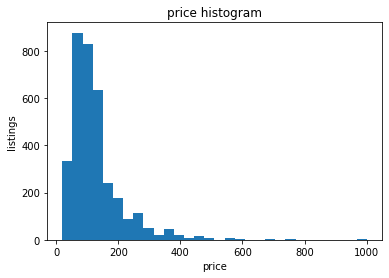

In [15]:
#plot price histogram 
plt.hist(df['float_price'], bins=30)
plt.ylabel('listings')
plt.xlabel('price')
plt.title('price histogram')



(3490,)

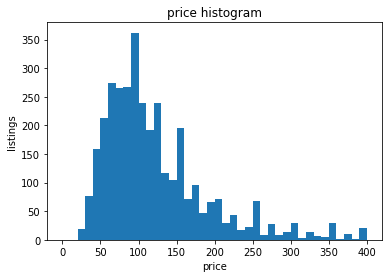

In [16]:
#plot price histogram with price < 400
plt.hist(df['float_price'], bins=40, range=(0,400))
plt.ylabel('listings')
plt.xlabel('price')
plt.title('price histogram')

df['float_price'].shape

In [17]:
df['host_has_profile_pic_f'].value_counts()

0    3484
1       6
Name: host_has_profile_pic_f, dtype: int64

In [18]:
df

,host_listings_count,accommodates,bathrooms,bedrooms,beds,number_of_reviews,reviews_per_month,review_scores_rating,float_price,float_host_response_rate,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_neighbourhood_Alki,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,host_neighbourhood_Baldwin Hills,host_neighbourhood_Ballard,host_neighbourhood_Belltown,host_neighbourhood_Beverly Hills,host_neighbourhood_Bitter Lake,host_neighbourhood_Brighton,host_neighbourhood_Broadview,host_neighbourhood_Broadway,host_neighbourhood_Bryant,host_neighbourhood_Capitol Hill,host_neighbourhood_Cedar Park,host_neighbourhood_Central Business District,host_neighbourhood_Central San Pedro,host_neighbourhood_Clairemont Mesa East,host_neighbourhood_Columbia City,host_neighbourhood_Crown Hill,host_neighbourhood_Downtown Toronto,host_neighbourhood_Dunlap,host_neighbourhood_East Village,host_neighbourhood_Eastlake,host_neighbourhood_Fauntleroy,host_neighbourhood_Fenway/Kenmore,host_neighbourhood_First Hill,host_neighbourhood_Forestland,host_neighbourhood_Fremont,host_neighbourhood_Gatewood,host_neighbourhood_Genesee,host_neighbourhood_Georgetown,host_neighbourhood_Green Lake,host_neighbourhood_Greenwood,host_neighbourhood_Haller Lake,host_neighbourhood_Harrison/Denny-Blaine,host_neighbourhood_Hell's Kitchen,host_neighbourhood_High Point,host_neighbourhood_Highland Park,host_neighbourhood_Holly,host_neighbourhood_Holly Park,host_neighbourhood_Hollywood,host_neighbourhood_Huntington Beach,host_neighbourhood_Industrial District,host_neighbourhood_Interbay,host_neighbourhood_International District,host_neighbourhood_Jamaica Plain,host_neighbourhood_Kaanapali,host_neighbourhood_Kauaʻi,host_neighbourhood_Laurelhurst,host_neighbourhood_Leschi,host_neighbourhood_Licton Springs,host_neighbourhood_Long Beach,host_neighbourhood_Lower Queen Anne,host_neighbourhood_Madison Park,host_neighbourhood_Madrona,host_neighbourhood_Magnolia,host_neighbourhood_Manhattan Beach,host_neighbourhood_Maple Leaf,host_neighbourhood_Mathews Beach,host_neighbourhood_Meadowbrook,host_neighbourhood_Minor,host_neighbourhood_Mission District,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_North Admiral,host_neighbourhood_North Beach/Blue Ridge,host_neighbourhood_North Beacon Hill,host_neighbourhood_North Delridge,host_neighbourhood_North Hollywood,host_neighbourhood_Northwest District,host_neighbourhood_Olympic Hills,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Pinehurst,host_neighbourhood_Pioneer Square,host_neighbourhood_Portage Bay,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Riverview,host_neighbourhood_Roosevelt,host_neighbourhood_Roxhill,host_neighbourhood_Santa Monica,host_neighbourhood_Seaview,host_neighbourhood_Seward Park,host_neighbourhood_South Beacon Hill,host_neighbourhood_South Delridge,host_neighbourhood_South Lake Union,host_neighbourhood_South Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Victory Heights,host_neighbourhood_View Ridge,host_neighbourhood_Waianae Coast,host_neighbourhood_Wallingford,host_neighbourhood_Wedgewood,host_neighbourhood_Westlake,host_neighbourhood_Windermere,host_neighbourhood_Yesler Terrace,neighbourhood_Alki,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Ballard,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,neighbourhood_Capitol Hill,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dunlap,neighbourhood_Eastlake,neighbourhood_F